In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling  #need to install using anaconda prompt (pip install pandas_profiling)
import sklearn 
import statsmodels
import statsmodels.formula.api as sm
import scipy.stats as stats
import os
import datetime as dt
import scipy.special as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices

In [5]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# importing dataset
train_data = pd.read_csv('Train.txt',sep=',')
test_data = pd.read_csv('Test.txt',sep=',')

In [8]:
train_data.head()

0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17.1  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...    0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...    0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...    1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...    1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...    0.07  0.07   

   0.17.2  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.88    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00    0.00   1.0    1.00  neptune  21  

[5 rows x 43 columns]

In [9]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 

In [10]:
train_data.columns=columns
test_data.columns=columns

In [11]:
train_data.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  last_flag  
0   normal         15  
1  neptune         19  
2   normal         21  
3   normal         21  
4  neptune         21  

[5 rows x 43 columns]

In [12]:
test_data.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         2           tcp  ftp_data    SF      12983          0     0   
2         0          icmp     eco_i    SF         20          0     0   
3         1           tcp    telnet  RSTO          0         15     0   
4         0           tcp      http    SF        267      14515     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.61   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    0.31   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.04                         0.61   
2                    0.00                         1.00   
3                    0.17                         0.03   
4                    0.00                         0.01   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.02                  0.00   
2                         0.28                  0.00   
3                         0.02                  0.00   
4                         0.03                  0.01   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  0.00                      0.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.83                      0.71   
4                       0.0                  0.00                      0.00   

    attack  last_flag  
0  neptune         21  
1   normal         21  
2    saint         15  
3    mscan         11  
4   normal         21  

[5 rows x 43 columns]

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
duration                       125972 non-null int64
protocol_type                  125972 non-null object
service                        125972 non-null object
flag                           125972 non-null object
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
duration                       22543 non-null int64
protocol_type                  22543 non-null object
service                        22543 non-null object
flag                           22543 non-null object
src_bytes                      22543 non-null int64
dst_bytes                      22543 non-null int64
land                           22543 non-null int64
wrong_fragment                 22543 non-null int64
urgent                         22543 non-null int64
hot                            22543 non-null int64
num_failed_logins              22543 non-null int64
logged_in                      22543 non-null int64
num_compromised                22543 non-null int64
root_shell                     22543 non-null int64
su_attempted                   22543 non-null int64
num_root                       22543 non-null int64
num_file_creations             22543 non-null int64
num_

In [15]:
train_data.describe().T

count          mean           std  min    25%  \
duration                     125972.0    287.146929  2.604526e+03  0.0   0.00   
src_bytes                    125972.0  45567.100824  5.870354e+06  0.0   0.00   
dst_bytes                    125972.0  19779.271433  4.021285e+06  0.0   0.00   
land                         125972.0      0.000198  1.408613e-02  0.0   0.00   
wrong_fragment               125972.0      0.022688  2.535310e-01  0.0   0.00   
urgent                       125972.0      0.000111  1.436608e-02  0.0   0.00   
hot                          125972.0      0.204411  2.149977e+00  0.0   0.00   
num_failed_logins            125972.0      0.001222  4.523932e-02  0.0   0.00   
logged_in                    125972.0      0.395739  4.890107e-01  0.0   0.00   
num_compromised              125972.0      0.279253  2.394214e+01  0.0   0.00   
root_shell                   125972.0      0.001342  3.660299e-02  0.0   0.00   
su_attempted                 125972.0      0.001103  4.515456e-02  0.0   0.00   
num_root                     125972.0      0.302194  2.439971e+01  0.0   0.00   
num_file_creations           125972.0      0.012669  4.839370e-01  0.0   0.00   
num_shells                   125972.0      0.000413  2.218122e-02  0.0   0.00   
num_access_files             125972.0      0.004096  9.936995e-02  0.0   0.00   
num_outbound_cmds            125972.0      0.000000  0.000000e+00  0.0   0.00   
is_host_login                125972.0      0.000008  2.817494e-03  0.0   0.00   
is_guest_login               125972.0      0.009423  9.661271e-02  0.0   0.00   
count                        125972.0     84.108207  1.145088e+02  0.0   2.00   
srv_count                    125972.0     27.738093  7.263609e+01  0.0   2.00   
serror_rate                  125972.0      0.284487  4.464567e-01  0.0   0.00   
srv_serror_rate              125972.0      0.282488  4.470236e-01  0.0   0.00   
rerror_rate                  125972.0      0.119959  3.204366e-01  0.0   0.00   
srv_rerror_rate              125972.0      0.121184  3.236483e-01  0.0   0.00   
same_srv_rate                125972.0      0.660925  4.396236e-01  0.0   0.09   
diff_srv_rate                125972.0      0.063053  1.803150e-01  0.0   0.00   
srv_diff_host_rate           125972.0      0.097322  2.598314e-01  0.0   0.00   
dst_host_count               125972.0    182.149200  9.920657e+01  0.0  82.00   
dst_host_srv_count           125972.0    115.653725  1.107029e+02  0.0  10.00   
dst_host_same_srv_rate       125972.0      0.521244  4.489501e-01  0.0   0.05   
dst_host_diff_srv_rate       125972.0      0.082952  1.889225e-01  0.0   0.00   
dst_host_same_src_port_rate  125972.0      0.148379  3.089984e-01  0.0   0.00   
dst_host_srv_diff_host_rate  125972.0      0.032543  1.125642e-01  0.0   0.00   
dst_host_serror_rate         125972.0      0.284455  4.447851e-01  0.0   0.00   
dst_host_srv_serror_rate     125972.0      0.278487  4.456702e-01  0.0   0.00   
dst_host_rerror_rate         125972.0      0.118832  3.065586e-01  0.0   0.00   
dst_host_srv_rerror_rate     125972.0      0.120241  3.194605e-01  0.0   0.00   
last_flag                    125972.0     19.504056  2.291512e+00  0.0  18.00   

                                50%     75%           max  
duration                       0.00    0.00  4.290800e+04  
src_bytes                     44.00  276.00  1.379964e+09  
dst_bytes                      0.00  516.00  1.309937e+09  
land                           0.00    0.00  1.000000e+00  
wrong_fragment                 0.00    0.00  3.000000e+00  
urgent                         0.00    0.00  3.000000e+00  
hot                            0.00    0.00  7.700000e+01  
num_failed_logins              0.00    0.00  5.000000e+00  
logged_in                      0.00    1.00  1.000000e+00  
num_compromised                0.00    0.00  7.479000e+03  
root_shell                     0.00    0.00  1.000000e+00  
su_attempted                   0.00    0.00  2.000000e+00  
num_root   

In [16]:
test_data.describe().T

count          mean            std  min  \
duration                     22543.0    218.868784    1407.207069  0.0   
src_bytes                    22543.0  10395.911369  472796.912692  0.0   
dst_bytes                    22543.0   2056.110012   21219.763847  0.0   
land                         22543.0      0.000311       0.017619  0.0   
wrong_fragment               22543.0      0.008428       0.142602  0.0   
urgent                       22543.0      0.000710       0.036474  0.0   
hot                          22543.0      0.105399       0.928448  0.0   
num_failed_logins            22543.0      0.021648       0.150331  0.0   
logged_in                    22543.0      0.442222       0.496661  0.0   
num_compromised              22543.0      0.119904       7.269758  0.0   
root_shell                   22543.0      0.002440       0.049335  0.0   
su_attempted                 22543.0      0.000266       0.021061  0.0   
num_root                     22543.0      0.114670       8.041792  0.0   
num_file_creations           22543.0      0.008739       0.676857  0.0   
num_shells                   22543.0      0.001153       0.048015  0.0   
num_access_files             22543.0      0.003549       0.067831  0.0   
num_outbound_cmds            22543.0      0.000000       0.000000  0.0   
is_host_login                22543.0      0.000488       0.022085  0.0   
is_guest_login               22543.0      0.028435       0.166214  0.0   
count                        22543.0     79.021692     128.538218  0.0   
srv_count                    22543.0     31.125316      89.064396  0.0   
serror_rate                  22543.0      0.102928       0.295373  0.0   
srv_serror_rate              22543.0      0.103640       0.298337  0.0   
rerror_rate                  22543.0      0.238429       0.416096  0.0   
srv_rerror_rate              22543.0      0.235145       0.416193  0.0   
same_srv_rate                22543.0      0.740376       0.412479  0.0   
diff_srv_rate                22543.0      0.094075       0.259143  0.0   
srv_diff_host_rate           22543.0      0.098115       0.253550  0.0   
dst_host_count               22543.0    193.866699      94.036867  0.0   
dst_host_srv_count           22543.0    140.756332     111.783059  0.0   
dst_host_same_srv_rate       22543.0      0.608747       0.435681  0.0   
dst_host_diff_srv_rate       22543.0      0.090541       0.220722  0.0   
dst_host_same_src_port_rate  22543.0      0.132267       0.306274  0.0   
dst_host_srv_diff_host_rate  22543.0      0.019639       0.085396  0.0   
dst_host_serror_rate         22543.0      0.097818       0.273144  0.0   
dst_host_srv_serror_rate     22543.0      0.099430       0.281872  0.0   
dst_host_rerror_rate         22543.0      0.233351       0.387204  0.0   
dst_host_srv_rerror_rate     22543.0      0.226649       0.400851  0.0   
last_flag                    22543.0     18.017833       4.270409  0.0   

                                25%     50%     75%         max  
duration                       0.00    0.00    0.00     57715.0  
src_bytes                      0.00   54.00  287.00  62825648.0  
dst_bytes                      0.00   46.00  601.00   1345927.0  
land                           0.00    0.00    0.00         1.0  
wrong_fragment                 0.00    0.00    0.00         3.0  
urgent                         0.00    0.00    0.00         3.0  
hot                            0.00    0.00    0.00       101.0  
num_failed_logins              0.00    0.00    0.00         4.0  
logged_in                      0.00    0.00    1.00         1.0  
num_compromised                0.00    0.00    0.00       796.0  
root_shell                     0.00    0.00    0.00         1.0  
su_attempted                   0.00    0.00    0.00         2.0  
num_root                       0.00    0.00    0.00       878.0  
num_file_creations             0.00    0.00    0.00       100.0  
num_shells                     0.00    0.00    0.00         5.0  
num_access_fil

In [17]:
# In attack_class if activity is normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4
train_data.loc[train_data.attack=='normal','attack_class']=0

train_data.loc[(train_data.attack=='back') | (train_data.attack=='land') | (train_data.attack=='pod') | (train_data.attack=='neptune') | 
         (train_data.attack=='smurf') | (train_data.attack=='teardrop') | (train_data.attack=='apache2') | (train_data.attack=='udpstorm') | 
         (train_data.attack=='processtable') | (train_data.attack=='worm') | (train_data.attack=='mailbomb'),'attack_class']=1

train_data.loc[(train_data.attack=='satan') | (train_data.attack=='ipsweep') | (train_data.attack=='nmap') | (train_data.attack=='portsweep') | 
          (train_data.attack=='mscan') | (train_data.attack=='saint'),'attack_class']=2

train_data.loc[(train_data.attack=='guess_passwd') | (train_data.attack=='ftp_write') | (train_data.attack=='imap') | (train_data.attack=='phf') | 
          (train_data.attack=='multihop') | (train_data.attack=='warezmaster') | (train_data.attack=='warezclient') | (train_data.attack=='spy') | 
          (train_data.attack=='xlock') | (train_data.attack=='xsnoop') | (train_data.attack=='snmpguess') | (train_data.attack=='snmpgetattack') | 
          (train_data.attack=='httptunnel') | (train_data.attack=='sendmail') | (train_data.attack=='named'),'attack_class']=3

train_data.loc[(train_data.attack=='buffer_overflow') | (train_data.attack=='loadmodule') | (train_data.attack=='rootkit') | (train_data.attack=='perl') | 
          (train_data.attack=='sqlattack') | (train_data.attack=='xterm') | (train_data.attack=='ps'),'attack_class']=4

In [18]:
test_data.loc[test_data.attack=='normal','attack_class']=0

test_data.loc[(test_data.attack=='back') | (test_data.attack=='land') | (test_data.attack=='pod') | (test_data.attack=='neptune') | 
         (test_data.attack=='smurf') | (test_data.attack=='teardrop') | (test_data.attack=='apache2') | (test_data.attack=='udpstorm') | 
         (test_data.attack=='processtable') | (test_data.attack=='worm') | (test_data.attack=='mailbomb'),'attack_class']=1

test_data.loc[(test_data.attack=='satan') | (test_data.attack=='ipsweep') | (test_data.attack=='nmap') | (test_data.attack=='portsweep') | 
          (test_data.attack=='mscan') | (test_data.attack=='saint'),'attack_class']=2

test_data.loc[(test_data.attack=='guess_passwd') | (test_data.attack=='ftp_write') | (test_data.attack=='imap') | (test_data.attack=='phf') | 
          (test_data.attack=='multihop') | (test_data.attack=='warezmaster') | (test_data.attack=='warezclient') | (test_data.attack=='spy') | 
          (test_data.attack=='xlock') | (test_data.attack=='xsnoop') | (test_data.attack=='snmpguess') | (test_data.attack=='snmpgetattack') | 
          (test_data.attack=='httptunnel') | (test_data.attack=='sendmail') | (test_data.attack=='named'),'attack_class']=3

test_data.loc[(test_data.attack=='buffer_overflow') | (test_data.attack=='loadmodule') | (test_data.attack=='rootkit') | (test_data.attack=='perl') | 
          (test_data.attack=='sqlattack') | (test_data.attack=='xterm') | (test_data.attack=='ps'),'attack_class']=4

In [19]:
train_data.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.60   
1               0       0    0  ...                    0.05   
2               0       0    0  ...                    0.00   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.88                         0.00   
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   

   dst_host_srv_rerror_rate   attack  last_flag  attack_class  
0                      0.00   normal         15           0.0  
1                      0.00  neptune         19           1.0  
2                      0.01   normal         21           0.0  
3                      0.00   normal         21           0.0  
4                      1.00  neptune         21           1.0  

[5 rows x 44 columns]

In [20]:
test_data.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         2           tcp  ftp_data    SF      12983          0     0   
2         0          icmp     eco_i    SF         20          0     0   
3         1           tcp    telnet  RSTO          0         15     0   
4         0           tcp      http    SF        267      14515     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.06   
1               0       0    0  ...                    0.04   
2               0       0    0  ...                    0.00   
3               0       0    0  ...                    0.17   
4               0       0    0  ...                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.61                         0.02   
2                         1.00                         0.28   
3                         0.03                         0.02   
4                         0.01                         0.03   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                       0.0                  1.00   
1                  0.00                       0.0                  0.00   
2                  0.00                       0.0                  0.00   
3                  0.00                       0.0                  0.83   
4                  0.01                       0.0                  0.00   

   dst_host_srv_rerror_rate   attack  last_flag  attack_class  
0                      1.00  neptune         21           1.0  
1                      0.00   normal         21           0.0  
2                      0.00    saint         15           2.0  
3                      0.71    mscan         11           2.0  
4                      0.00   normal         21           0.0  

[5 rows x 44 columns]

In [22]:
train_data = train_data.drop(['attack'],axis=1)
test_data = test_data.drop(['attack'],axis=1)

In [23]:
pandas_profiling.ProfileReport(train_data)

### Dropping columns based on pandas profiling report
        - High correlations between two numerical variables
        - High missings (>25% missings)
        - High cardinatilty (>30) of categorical variables
        - Variables having constant value

In [24]:
train_data = train_data.drop(['dst_host_srv_rerror_rate','dst_host_srv_serror_rate','num_outbound_cmds','num_root','rerror_rate',
                             'serror_rate','service','srv_rerror_rate','srv_serror_rate'],axis=1)

In [25]:
test_data = test_data.drop(['dst_host_srv_rerror_rate','dst_host_srv_serror_rate','num_outbound_cmds','num_root','rerror_rate',
                             'serror_rate','service','srv_rerror_rate','srv_serror_rate'],axis=1)

In [26]:
dtype_df = train_data.dtypes.reset_index().rename(columns={0:'datatype','index':'col_name'})
dtype_df

col_name datatype
0                      duration    int64
1                 protocol_type   object
2                          flag   object
3                     src_bytes    int64
4                     dst_bytes    int64
5                          land    int64
6                wrong_fragment    int64
7                        urgent    int64
8                           hot    int64
9             num_failed_logins    int64
10                    logged_in    int64
11              num_compromised    int64
12                   root_shell    int64
13                 su_attempted    int64
14           num_file_creations    int64
15                   num_shells    int64
16             num_access_files    int64
17                is_host_login    int64
18               is_guest_login    int64
19                        count    int64
20                    srv_count    int64
21                same_srv_rate  float64
22                diff_srv_rate  float64
23           srv_diff_host_rate  float64
24               dst_host_count    int64
25           dst_host_srv_count    int64
26       dst_host_same_srv_rate  float64
27       dst_host_diff_srv_rate  float64
28  dst_host_same_src_port_rate  float64
29  dst_host_srv_diff_host_rate  float64
30         dst_host_serror_rate  float64
31         dst_host_rerror_rate  float64
32                    last_flag    int64
33                 attack_class  float64

In [27]:
# Seperating num and cat train data
num_data_train = train_data.loc[:,list(dtype_df.col_name[(dtype_df.datatype == 'float64')|(dtype_df.datatype == 'int64')|(dtype_df.datatype == 'float32')|(dtype_df.datatype == 'int32')])]
num_data_train.info()
print('---------------')
cat_data_train = train_data.loc[:,list(dtype_df.col_name[(dtype_df.datatype == 'object')|(dtype_df.datatype == 'O')])]
cat_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 32 columns):
duration                       125972 non-null int64
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_file_creations             125972 non-null int64
num_shells                     125972 non-null int64
num_access_files               125972 non-null int64
is_host_login                  125972 non-null int64
is_guest_login                 125972 non

In [28]:
# Seperating num and cat test data
num_data_test = test_data.loc[:,list(dtype_df.col_name[(dtype_df.datatype == 'float64')|(dtype_df.datatype == 'int64')|(dtype_df.datatype == 'float32')|(dtype_df.datatype == 'int32')])]
num_data_test.info()
print('---------------')
cat_data_test = test_data.loc[:,list(dtype_df.col_name[(dtype_df.datatype == 'object')|(dtype_df.datatype == 'O')])]
cat_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 32 columns):
duration                       22543 non-null int64
src_bytes                      22543 non-null int64
dst_bytes                      22543 non-null int64
land                           22543 non-null int64
wrong_fragment                 22543 non-null int64
urgent                         22543 non-null int64
hot                            22543 non-null int64
num_failed_logins              22543 non-null int64
logged_in                      22543 non-null int64
num_compromised                22543 non-null int64
root_shell                     22543 non-null int64
su_attempted                   22543 non-null int64
num_file_creations             22543 non-null int64
num_shells                     22543 non-null int64
num_access_files               22543 non-null int64
is_host_login                  22543 non-null int64
is_guest_login                 22543 non-null int64
count  

In [29]:
def num_data_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.median(),x.mean(),x.std(),x.std()/x.mean(),x.var(),x.min(),x.quantile(0.01),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),x.quantile(0.90),x.quantile(0.95),x.quantile(0.99),x.max()],
                       index= ['Non_null','Null','Sum','Median','Mean','Std_Dev','CV','Variance','Min','P1','P10','P25','P50','P75','P90','P95','P99','Max'])
num_data_sum =num_data_train.apply(num_data_summary)
num_data_sum.to_csv('num_data_sum.csv')
num_data_sum.T

Non_null  Null           Sum  Median  \
duration                     125972.0   0.0  3.617247e+07    0.00   
src_bytes                    125972.0   0.0  5.740179e+09   44.00   
dst_bytes                    125972.0   0.0  2.491634e+09    0.00   
land                         125972.0   0.0  2.500000e+01    0.00   
wrong_fragment               125972.0   0.0  2.858000e+03    0.00   
urgent                       125972.0   0.0  1.400000e+01    0.00   
hot                          125972.0   0.0  2.575000e+04    0.00   
num_failed_logins            125972.0   0.0  1.540000e+02    0.00   
logged_in                    125972.0   0.0  4.985200e+04    0.00   
num_compromised              125972.0   0.0  3.517800e+04    0.00   
root_shell                   125972.0   0.0  1.690000e+02    0.00   
su_attempted                 125972.0   0.0  1.390000e+02    0.00   
num_file_creations           125972.0   0.0  1.596000e+03    0.00   
num_shells                   125972.0   0.0  5.200000e+01    0.00   
num_access_files             125972.0   0.0  5.160000e+02    0.00   
is_host_login                125972.0   0.0  1.000000e+00    0.00   
is_guest_login               125972.0   0.0  1.187000e+03    0.00   
count                        125972.0   0.0  1.059528e+07   14.00   
srv_count                    125972.0   0.0  3.494223e+06    8.00   
same_srv_rate                125972.0   0.0  8.325804e+04    1.00   
diff_srv_rate                125972.0   0.0  7.942930e+03    0.00   
srv_diff_host_rate           125972.0   0.0  1.225990e+04    0.00   
dst_host_count               125972.0   0.0  2.294570e+07  255.00   
dst_host_srv_count           125972.0   0.0  1.456913e+07   63.00   
dst_host_same_srv_rate       125972.0   0.0  6.566221e+04    0.51   
dst_host_diff_srv_rate       125972.0   0.0  1.044957e+04    0.02   
dst_host_same_src_port_rate  125972.0   0.0  1.869156e+04    0.00   
dst_host_srv_diff_host_rate  125972.0   0.0  4.099470e+03    0.00   
dst_host_serror_rate         125972.0   0.0  3.583333e+04    0.00   
dst_host_rerror_rate         125972.0   0.0  1.496955e+04    0.00   
last_flag                    125972.0   0.0  2.456965e+06   20.00   
attack_class                 125972.0   0.0  7.243200e+04    0.00   

                                     Mean       Std_Dev          CV  \
duration                       287.146929  2.604526e+03    9.070358   
src_bytes                    45567.100824  5.870354e+06  128.828790   
dst_bytes                    19779.271433  4.021285e+06  203.308050   
land                             0.000198  1.408613e-02   70.978306   
wrong_fragment                   0.022688  2.535310e-01   11.174879   
urgent                           0.000111  1.436608e-02  129.266021   
hot                              0.204411  2.149977e+00   10.517937   
num_failed_logins                0.001222  4.523932e-02   37.005762   
logged_in                        0.395739  4.890107e-01    1.235691   
num_compromised                  0.279253  2.394214e+01   85.736509   
root_shell                       0.001342  3.660299e-02   27.283738   
su_attempted                     0.001103  4.515456e-02   40.922378   
num_file_creations               0.012669  4.839370e-01   38.197062   
num_shells                       0.000413  2.218122e-02   53.734851   
num_access_files                 0.004096  9.936995e-02   24.259363   
is_host_login                    0.000008  2.817494e-03  354.925344   
is_guest_login                   0.009423  9.661271e-02   10.253156   
count                           84.108207  1.145088e+02    1.361447   
srv_count                       27.738093  7.263609e+01    2.618640   
same_srv_rate                    0.660925  4.396236e-01    0.665164   
diff_srv_rate                    0.063053  1.803150e-01    2.859731   
srv_diff_host_rate               0.097322  2.598314e-01    2.669800   
dst_host_count                 182.149200  9.920657e+01    0.544645   
dst_host_srv_count             115.653725  1.10

In [30]:
cont_vars = []
discrete_vars = []
for var in num_data_train.columns:
    if len(np.unique(num_data_train[var])) <= 40:
        discrete_vars.append(var)
    else:
        cont_vars.append(var)
print('Continous Variables are ----')
print(cont_vars)
print('Discrete Variables are ----')
print(discrete_vars)

Continous Variables are ----
['duration', 'src_bytes', 'dst_bytes', 'num_compromised', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate']
Discrete Variables are ----
['land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'last_flag', 'attack_class']


In [31]:
# Missing value and outliers of continuous num data
def missing_replacing_num(x):
    return x.fillna(x.median()) # median is used as it is not affected by outliers
def outiers_capping(x):
    return x.clip(x.quantile(0.01),x.quantile(0.99))
num_data_train_modified_cont = num_data_train[cont_vars].apply(missing_replacing_num)
num_data_train_modified_cont = num_data_train_modified_cont.apply(outiers_capping)
num_data_test_modified_cont = num_data_test[cont_vars].apply(missing_replacing_num)
num_data_test_modified_cont = num_data_test_modified_cont.apply(outiers_capping)

In [32]:
# Missigs of discrete num data
def missing_replacing_discrete(x):
    return x.fillna(x.mode()[0]) 
num_data_train_modified_discrete = num_data_train[discrete_vars].apply(missing_replacing_discrete)
num_data_test_modified_discrete = num_data_test[discrete_vars].apply(missing_replacing_discrete)

In [33]:
num_data_train_modified = pd.concat([num_data_train_modified_cont,num_data_train_modified_discrete],axis=1)
num_data_test_modified = pd.concat([num_data_test_modified_cont,num_data_test_modified_discrete],axis=1)

In [34]:
print(num_data_train_modified.info())
print('----------------------------------------')
print(num_data_test_modified.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 32 columns):
duration                       125972 non-null float64
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
num_compromised                125972 non-null int64
count                          125972 non-null int64
srv_count                      125972 non-null int64
same_srv_rate                  125972 non-null float64
diff_srv_rate                  125972 non-null float64
srv_diff_host_rate             125972 non-null float64
dst_host_count                 125972 non-null int64
dst_host_srv_count             125972 non-null int64
dst_host_same_srv_rate         125972 non-null float64
dst_host_diff_srv_rate         125972 non-null float64
dst_host_same_src_port_rate    125972 non-null float64
dst_host_srv_diff_host_rate    125972 non-null float64
dst_host_serror_rate           125972 non-null float64
dst_host_rerror_rate   

In [35]:
def cat_data_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.mode()[0],len(x.value_counts())],index=['Not_Null','Null','Mode','Numbers of Categories'])
cat_data_sum = cat_data_train.apply(cat_data_summary)
cat_data_sum.to_csv('cat_data_sum.csv')
cat_data_sum.T

Not_Null Null Mode Numbers of Categories
protocol_type   125972    0  tcp                     3
flag            125972    0   SF                    11

In [36]:
# Dummy encoding of categorical vars
def dummy_encoding(x,df):
    dummy = pd.get_dummies(df[x],prefix=x,drop_first=True) 
    df = df.drop([x],axis=1)
    df = pd.concat([df,dummy],axis=1)
    return df

In [37]:
cat_data_train_modified = cat_data_train.copy()
cat_data_test_modified = cat_data_test.copy()

In [38]:
for col in cat_data_train.columns:
    cat_data_train_modified = dummy_encoding(col,cat_data_train_modified)

In [39]:
for col in cat_data_test.columns:
    cat_data_test_modified = dummy_encoding(col,cat_data_test_modified)

In [40]:
cat_data_train_modified.head()

protocol_type_tcp  protocol_type_udp  flag_REJ  flag_RSTO  flag_RSTOS0  \
0                  0                  1         0          0            0   
1                  1                  0         0          0            0   
2                  1                  0         0          0            0   
3                  1                  0         0          0            0   
4                  1                  0         1          0            0   

   flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  
0          0        0        0        0        0        1        0  
1          0        1        0        0        0        0        0  
2          0        0        0        0        0        1        0  
3          0        0        0        0        0        1        0  
4          0        0        0        0        0        0        0

In [41]:
# Combine num and cat data
modified_data_train = pd.concat([num_data_train_modified,cat_data_train_modified],axis=1)
modified_data_test = pd.concat([num_data_test_modified,cat_data_test_modified],axis=1)

In [42]:
modified_data_train.head()

duration  src_bytes  dst_bytes  num_compromised  count  srv_count  \
0       0.0        146          0                0     13          1   
1       0.0          0          0                0    123          6   
2       0.0        232       8153                0      5          5   
3       0.0        199        420                0     30         32   
4       0.0          0          0                0    121         19   

   same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  ...  \
0           0.08           0.15                0.00             255  ...   
1           0.05           0.07                0.00             255  ...   
2           1.00           0.00                0.00              30  ...   
3           1.00           0.00                0.09             255  ...   
4           0.16           0.06                0.00             255  ...   

   flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  \
0         0          0            0          0        0        0        0   
1         0          0            0          0        1        0        0   
2         0          0            0          0        0        0        0   
3         0          0            0          0        0        0        0   
4         1          0            0          0        0        0        0   

   flag_S3  flag_SF  flag_SH  
0        0        1        0  
1        0        0        0  
2        0        1        0  
3        0        1        0  
4        0        0        0  

[5 rows x 44 columns]

In [43]:
modified_data_test.head()

duration  src_bytes  dst_bytes  num_compromised  count  srv_count  \
0       0.0          0        0.0                0    136          1   
1       2.0      12983        0.0                0      1          1   
2       0.0         20        0.0                0      1         65   
3       1.0          0       15.0                0      1          8   
4       0.0        267    14515.0                0      4          4   

   same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  ...  \
0           0.01           0.06                0.00             255  ...   
1           1.00           0.00                0.00             134  ...   
2           1.00           0.00                1.00               3  ...   
3           1.00           0.00                0.75              29  ...   
4           1.00           0.00                0.00             155  ...   

   flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  \
0         1          0            0          0        0        0        0   
1         0          0            0          0        0        0        0   
2         0          0            0          0        0        0        0   
3         0          1            0          0        0        0        0   
4         0          0            0          0        0        0        0   

   flag_S3  flag_SF  flag_SH  
0        0        0        0  
1        0        1        0  
2        0        1        0  
3        0        0        0  
4        0        1        0  

[5 rows x 44 columns]

# Variable Reduction using Recursive Feature Elimination

In [44]:
features = modified_data_train[modified_data_train.columns.difference(['attack_class'])]
target = modified_data_train['attack_class']

In [47]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(features, target )
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False  True False False False  True False
  True False False False  True  True False False  True False False  True
 False False False False False  True False False False  True  True  True
  True False False False False False  True]
[22  1 28 27  1 11  1 16  3 26  1 24  1  2  7  6  1  1 15 20  1 10 18  1
 25  5 19 13  9  1  8 14 21  1  1  1  1 29 23 12  4 17  1]


In [48]:
selected_features_from_rfe = features.columns[rfe.get_support()].tolist()

In [49]:
print(selected_features_from_rfe)

['diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'flag_REJ', 'flag_S0', 'flag_S1', 'flag_SF', 'is_guest_login', 'num_compromised', 'protocol_type_tcp', 'protocol_type_udp', 'root_shell', 'same_srv_rate', 'wrong_fragment']


# Feature Selection using Select K-Best technique

In [50]:
Kbest = SelectKBest(f_classif, k=15).fit(features, target )
Kbest.get_support()

array([ True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False])

In [51]:
selected_features_from_Kbest = features.columns[Kbest.get_support()].tolist()

In [52]:
print(selected_features_from_Kbest)

['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'flag_RSTR', 'flag_S0', 'flag_SF', 'last_flag', 'logged_in', 'same_srv_rate']


# Feature Selection using Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(features,target)

In [60]:
feature_imp_df = pd.DataFrame({'features': features.columns,'feature_importance':rf.feature_importances_}).sort_values(by=['feature_importance'],ascending=False)
feature_imp_df

features  feature_importance
37                    src_bytes            0.167235
36                same_srv_rate            0.166494
4        dst_host_diff_srv_rate            0.112246
1                 diff_srv_rate            0.091594
2                     dst_bytes            0.068241
0                         count            0.055998
6   dst_host_same_src_port_rate            0.052983
9            dst_host_srv_count            0.052725
26                    last_flag            0.046145
20                      flag_SF            0.022087
38                    srv_count            0.019060
3                dst_host_count            0.018785
10  dst_host_srv_diff_host_rate            0.018532
7        dst_host_same_srv_rate            0.018033
33            protocol_type_tcp            0.017629
34            protocol_type_udp            0.010641
8          dst_host_serror_rate            0.010051
42               wrong_fragment            0.006980
16                      flag_S0            0.006902
27                    logged_in            0.006767
5          dst_host_rerror_rate            0.006383
22                          hot            0.004768
15                    flag_RSTR            0.004211
39           srv_diff_host_rate            0.004027
29              num_compromised            0.003438
12                     flag_REJ            0.003281
11                     duration            0.001390
23               is_guest_login            0.000973
21                      flag_SH            0.000789
13                    flag_RSTO            0.000379
14                  flag_RSTOS0            0.000371
17                      flag_S1            0.000330
30            num_failed_logins            0.000180
31           num_file_creations            0.000134
35                   root_shell            0.000063
25                         land            0.000049
28             num_access_files            0.000031
32                   num_shells            0.000026
18                      flag_S2            0.000022
41                       urgent            0.000016
19                      flag_S3            0.000009
40                 su_attempted            0.000004
24                is_host_login            0.000000

In [63]:
selected_features_from_random_forest = feature_imp_df.features[:15].tolist()

In [64]:
print(selected_features_from_random_forest)

['src_bytes', 'same_srv_rate', 'dst_host_diff_srv_rate', 'diff_srv_rate', 'dst_bytes', 'count', 'dst_host_same_src_port_rate', 'dst_host_srv_count', 'last_flag', 'flag_SF', 'srv_count', 'dst_host_count', 'dst_host_srv_diff_host_rate', 'dst_host_same_srv_rate', 'protocol_type_tcp']


# Final selected features

In [65]:
# Create a combined list of features selected from all above techniques 

In [66]:
selected_features = set(selected_features_from_rfe + selected_features_from_Kbest + selected_features_from_random_forest)

In [67]:
selected_features = list(selected_features)
print(selected_features)

['dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'last_flag', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'protocol_type_tcp', 'flag_S1', 'flag_RSTR', 'diff_srv_rate', 'srv_count', 'dst_host_same_src_port_rate', 'num_compromised', 'flag_REJ', 'wrong_fragment', 'dst_bytes', 'protocol_type_udp', 'flag_S0', 'src_bytes', 'same_srv_rate', 'is_guest_login', 'flag_SF', 'dst_host_count', 'count', 'root_shell', 'logged_in', 'dst_host_diff_srv_rate']


# Model Building

In [70]:
train_X = modified_data_train[selected_features]
train_y = modified_data_train.attack_class

In [71]:
test_X = modified_data_test[selected_features]
test_y = modified_data_test.attack_class

In [72]:
# baseline model
clf = RandomForestClassifier()
clf.fit(train_X,train_y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
# Prediction
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

In [74]:
clf_train_pred = pd.DataFrame()
clf_train_pred['actual'] = train_y
clf_train_pred['predicted'] = y_pred_train
clf_test_pred = pd.DataFrame()
clf_test_pred['actual'] = test_y
clf_test_pred['predicted'] = y_pred_test

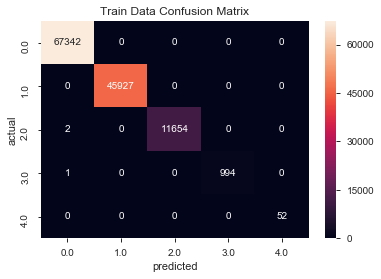

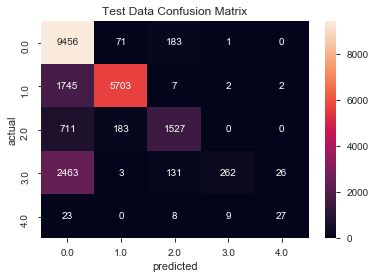

In [84]:
sns.heatmap(pd.crosstab(clf_train_pred['actual'], clf_train_pred['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(clf_test_pred['actual'], clf_test_pred['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [85]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(clf_train_pred['actual'], clf_train_pred['predicted']))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(clf_test_pred['actual'], clf_test_pred['predicted']))

The overall accuracy score for the Train Data is :  0.9999761851840091
The overall accuracy score for the Test Data  is :  0.7530053675198509


# Tuning the parameters using GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(3, 16),
    'max_features': np.arange(3,7),
    'bootstrap': [False, True],
    'n_jobs':[-1]
}

best_clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 10)
best_clf.fit(train_X, train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100], 'max_depth': array([3, 4, 5, 6, 7, 8]), 'max_features': array([3, 4, 5]), 'bootstrap': [False, True], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [92]:
best_clf.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=8, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
best_clf.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 5,
 'n_estimators': 100,
 'n_jobs': -1}

In [94]:
best_clf.best_score_

0.9974279998729877

# Building Best Model

In [95]:
rf = RandomForestClassifier(n_estimators=150,max_features=5,max_depth=8,bootstrap=False,n_jobs=-1).fit(train_X, train_y)

In [96]:
pd.DataFrame(rf.predict_proba(train_X))

0         1         2         3         4
0       0.724449  0.069216  0.198280  0.007503  0.000553
1       0.000124  0.999684  0.000192  0.000000  0.000000
2       0.998880  0.000418  0.000125  0.000558  0.000019
3       0.998840  0.000759  0.000165  0.000215  0.000022
4       0.000519  0.998541  0.000941  0.000000  0.000000
5       0.000118  0.999691  0.000191  0.000000  0.000000
6       0.000121  0.999688  0.000192  0.000000  0.000000
7       0.000118  0.999676  0.000205  0.000000  0.000000
8       0.000118  0.999691  0.000191  0.000000  0.000000
9       0.000516  0.998544  0.000940  0.000000  0.000000
10      0.000144  0.999544  0.000312  0.000000  0.000000
11      0.998691  0.000542  0.000121  0.000563  0.000083
12      0.197228  0.019538  0.024106  0.756125  0.003003
13      0.000134  0.998631  0.001235  0.000000  0.000000
14      0.000127  0.999663  0.000210  0.000000  0.000000
15      0.998465  0.001282  0.000092  0.000146  0.000015
16      0.080859  0.017976  0.897914  0.002984  0.000267
17      0.999237  0.000416  0.000127  0.000200  0.000020
18      0.999011  0.000449  0.000127  0.000396  0.000017
19      0.000125  0.999661  0.000214  0.000000  0.000000
20      0.000125  0.999682  0.000193  0.000000  0.000000
21      0.998465  0.001282  0.000092  0.000146  0.000015
22      0.991297  0.005469  0.002249  0.000779  0.000206
23      0.000129  0.999568  0.000302  0.000000  0.000000
24      0.981962  0.009583  0.002037  0.005592  0.000826
25      0.000118  0.999691  0.000191  0.000000  0.000000
26      0.999220  0.000401  0.000123  0.000234  0.000021
27      0.997965  0.001715  0.000135  0.000165  0.000019
28      0.998840  0.000759  0.000165  0.000215  0.000022
29      0.011334  0.002934  0.985043  0.000577  0.000112
...          ...       ...       ...       ...       ...
125942  0.986111  0.002681  0.003653  0.007322  0.000232
125943  0.994314  0.001725  0.000873  0.002835  0.000254
125944  0.998792  0.000864  0.000127  0.000198  0.000020
125945  0.000125  0.999676  0.000199  0.000000  0.000000
125946  0.032396  0.007027  0.956672  0.003629  0.000275
125947  0.000118  0.999691  0.000191  0.000000  0.000000
125948  0.940681  0.032811  0.023694  0.002690  0.000125
125949  0.168534  0.722787  0.104627  0.003433  0.000618
125950  0.998517  0.000661  0.000207  0.000540  0.000075
125951  0.917499  0.021739  0.012701  0.045483  0.002579
125952  0.001315  0.998251  0.000433  0.000000  0.000000
125953  0.998366  0.001329  0.000097  0.000185  0.000023
125954  0.964247  0.004275  0.022291  0.008514  0.000673
125955  0.970511  0.016364  0.011971  0.001051  0.000103
125956  0.988216  0.001160  0.000889  0.009555  0.000180
125957  0.000118  0.999691  0.000191  0.000000  0.000000
125958  0.998997  0.000450  0.000132  0.000401  0.000020
125959  0.998840  0.000759  0.000165  0.000215  0.000022
125960  0.998646  0.000783  0.000191  0.000343  0.000037
125961  0.939128  0.030991  0.028307  0.001354  0.000220
125962  0.998362  0.001222  0.000166  0.000230  0.000021
125963  0.000118  0.999691  0.000191  0.000000  0.000000
125964  0.903063  0.011646  0.012767  0.063844  0.008680
125965  0.000144  0.999544  0.000312  0.000000  0.000000
125966  0.979659  0.007773  0.000929  0.011114  0.000524
125967  0.000127  0.999673  0.000200  0.000000  0.000000
125968  0.997623  0.001586  0.000512  0.000248  0.000031
125969  0.975754  0.008505  0.003664  0.011532  0.000544
125970  0.000125  0.999676  0.000199  0.000000  0.000000
125971  0.980198  0.009224  0.004342  0.006003  0.000233

[125972 rows x 5 columns]

In [97]:
# Prediction
y_pred_train = rf.predict(train_X)
y_pred_test = rf.predict(test_X)

In [98]:
clf_train_pred = pd.DataFrame()
clf_train_pred['actual'] = train_y
clf_train_pred['predicted'] = y_pred_train
clf_test_pred = pd.DataFrame()
clf_test_pred['actual'] = test_y
clf_test_pred['predicted'] = y_pred_test

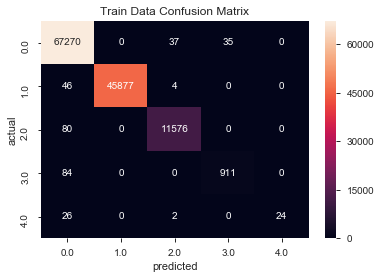

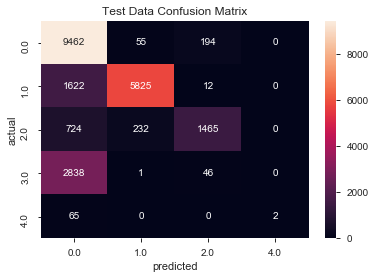

In [99]:
sns.heatmap(pd.crosstab(clf_train_pred['actual'], clf_train_pred['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(clf_test_pred['actual'], clf_test_pred['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [100]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(clf_train_pred['actual'], clf_train_pred['predicted']))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(clf_test_pred['actual'], clf_test_pred['predicted']))

The overall accuracy score for the Train Data is :  0.9975073825929571
The overall accuracy score for the Test Data  is :  0.7432018808499312


In [101]:
print(metrics.classification_report(clf_train_pred['actual'], clf_train_pred['predicted']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67342
         1.0       1.00      1.00      1.00     45927
         2.0       1.00      0.99      0.99     11656
         3.0       0.96      0.92      0.94       995
         4.0       1.00      0.46      0.63        52

   micro avg       1.00      1.00      1.00    125972
   macro avg       0.99      0.87      0.91    125972
weighted avg       1.00      1.00      1.00    125972



In [105]:
print(metrics.classification_report(clf_test_pred['actual'], clf_test_pred['predicted']))

              precision    recall  f1-score   support

         0.0       0.64      0.97      0.77      9711
         1.0       0.95      0.78      0.86      7459
         2.0       0.85      0.61      0.71      2421
         3.0       0.00      0.00      0.00      2885
         4.0       1.00      0.03      0.06        67

   micro avg       0.74      0.74      0.74     22543
   macro avg       0.69      0.48      0.48     22543
weighted avg       0.69      0.74      0.69     22543



# Identifying Important Features

In [106]:
feature_imp_df = pd.DataFrame({'features': train_X.columns,'feature_importance':rf.feature_importances_}).sort_values(by=['feature_importance'],ascending=False)
feature_imp_df

features  feature_importance
17                    src_bytes            0.141427
18                same_srv_rate            0.110509
8                 diff_srv_rate            0.101219
20                      flag_SF            0.076891
22                        count            0.074355
14                    dst_bytes            0.073814
1          dst_host_serror_rate            0.063578
2                     last_flag            0.056287
25       dst_host_diff_srv_rate            0.049100
16                      flag_S0            0.045668
10  dst_host_same_src_port_rate            0.040231
4            dst_host_srv_count            0.031683
9                     srv_count            0.029173
24                    logged_in            0.023481
3        dst_host_same_srv_rate            0.019394
0   dst_host_srv_diff_host_rate            0.017346
5             protocol_type_tcp            0.011133
21               dst_host_count            0.010591
13               wrong_fragment            0.006506
15            protocol_type_udp            0.006178
11              num_compromised            0.004587
7                     flag_RSTR            0.003307
12                     flag_REJ            0.002269
19               is_guest_login            0.001064
6                       flag_S1            0.000152
23                   root_shell            0.000056

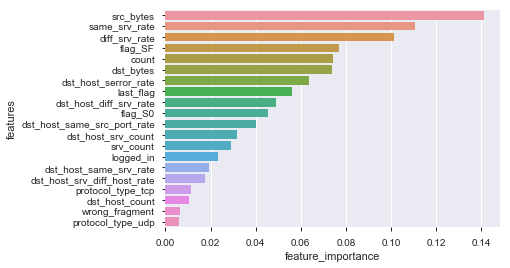

In [107]:
sns.barplot(x=feature_imp_df.iloc[:20,:].feature_importance,y=feature_imp_df.iloc[:20,:].features)
plt.show()